# Machine Learning IPN - Trabajo 15 marzo 2021
## Rodolfo Martínez Vega

## 1. Cargar los datos (1 punto)

Abre el dataset `work/dataset/admission_predict.csv` con pandas y muestra las primeras 5 filas.

In [1]:
import pandas as pd

data = pd.read_csv('datasets/admission_predict.csv', header=0)

data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


## 2. Seleccionar las columnas de trabajo (2 puntos)

Selecciona las columnas del dataframe y construye la matriz X, o el dataframe X. Puedes renombrar cada columna como `x1`, `x2`, `x3`, ..., `xn`.

> Pista: Crea un nuevo *dataframe* con las series de cada columna como un eje (columna) `xn`.



In [2]:
X = pd.DataFrame({
    "x1": data["GRE Score"],
    "x2": data["TOEFL Score"],
    "x3": data["University Rating"],
    "x4": data["SOP"],
    "x5": data["LOR "],
    "x6": data["CGPA"],
    "x7": data["Research"],
})

y = data["Chance of Admit "]

y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

## 3. Visualiza cada eje respecto al valor de predicción (3 puntos)

Investiga como crear 7 gráficas usando `subplots` de *Matplotlib*, o usa un `for` para graficar cada eje respecto a `Chance of Admit`.

Por ejemplo, la gráfica tipo *scatter* de `GRE Score` vs `Chance of Admit`, la gráfica tipo *scatter* de `TOEFL Score` vs `Chance of Admit`, etc.

> Pista: https://matplotlib.org/stable/gallery/axes_grid1/demo_axes_grid.html#sphx-glr-gallery-axes-grid1-demo-axes-grid-py

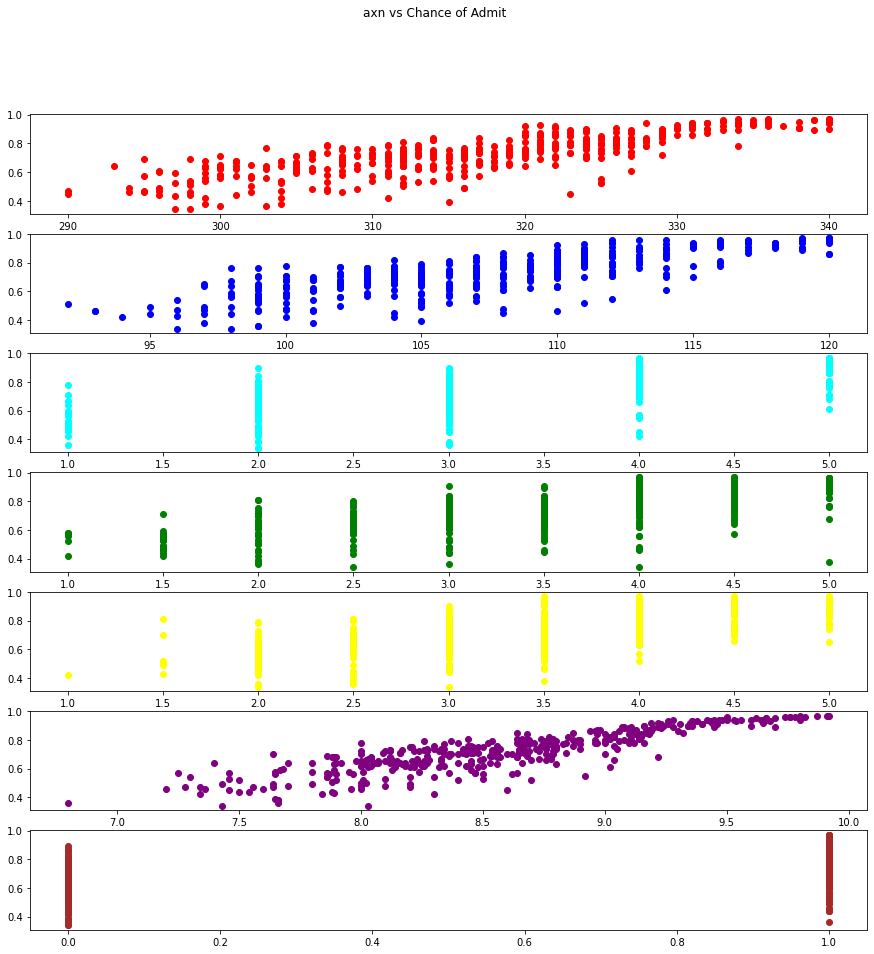

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(7, figsize=(15,15))
fig.suptitle('axn vs Chance of Admit')

axs[0].scatter(X["x1"], y, c="red")
axs[1].scatter(X["x2"], y, c="blue")
axs[2].scatter(X["x3"], y, c="cyan")
axs[3].scatter(X["x4"], y, c="green")
axs[4].scatter(X["x5"], y, c="yellow")
axs[5].scatter(X["x6"], y, c="purple")
axs[6].scatter(X["x7"], y, c="brown")



## 4. Crea un regresor lineal (4 puntos)

Construye un regresor de la clase `LinearRegression` de *sklearn*.

Ajusta el regresor a `X`, `y`.

Obtén el `score` (R<sup>2</sup>) sobre `X`, `y`.

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y)

print("R^2:", reg.score(X, y))

R^2: 0.8034713719824393


## 5. Descarta ejes (2 puntos)

Descarta los ejes de pendiente cercana a 0, y deja sólo a los más significativos.

In [5]:
X = X.drop(columns=["x1", "x4"])

print(X)

reg.fit(X, y)

print("\nNew Scores: ", reg.coef_)

print("\nNew R^2:", reg.score(X, y))


      x2  x3   x5    x6  x7
0    118   4  4.5  9.65   1
1    107   4  4.5  8.87   1
2    104   3  3.5  8.00   1
3    110   3  2.5  8.67   1
4    103   2  3.0  8.21   0
..   ...  ..  ...   ...  ..
395  110   3  3.5  9.04   1
396  107   3  3.5  9.11   1
397  116   4  4.5  9.45   1
398  103   3  4.0  8.78   0
399  117   4  4.0  9.66   1

[400 rows x 5 columns]

New Scores:  [0.00427463 0.00522161 0.02032318 0.13132446 0.03092204]

New R^2: 0.7989015932473845


## 6. Visualización en 2D (4 puntos)

Crea una gráfica 2D con los dos ejes más representativos, dónde el color sea el eje correspondiente a `Chance of Admit`.

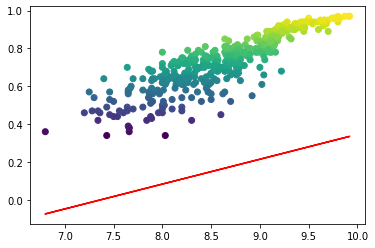

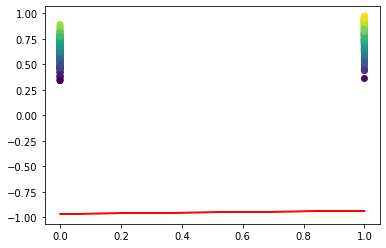

In [6]:
m1 = reg.coef_[3]
m2 = reg.coef_[4]

x1 = X["x6"]
x2 = X["x7"]

b = reg.intercept_

y_predict_1 = [m1 * x1[i] + b for i in range(len(y))]
y_predict_2 = [m2 * x2[i] + b for i in range(len(y))]

plt.scatter(x1, y, c=y)
plt.plot(x1, y_predict_1, "red")
plt.show()

plt.clf()
plt.scatter(x2, y, c=y)
plt.plot(x2, y_predict_2, "red")
plt.show()

## 7. Visualización en 3D (4 puntos)

Crea una gráfica 3D con los dos ejes más representativos, y el plano ajustado correspondiente a `Chance of Admit`.

Total de puntos: 20

Mínimos requeridos: 10

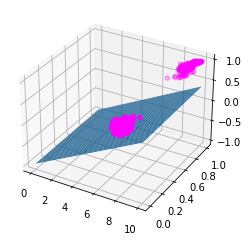

In [7]:
N = len(y)

X = np.linspace(0, 10, N)
Y = np.linspace(0, 1, N)

X, Y = np.meshgrid(X, Y)

Z = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        Z[i][j] = m1 * X[i][j] + m2 * Y[i][j] + b

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.scatter(x1, x2, y, c="magenta")
plt.show()

# NOTA: Ésta gráfica creo que no está del todo correcta porque el plano de 'Z' sale muy alejado de x1 y x2